In [37]:
# import Libraries 
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# dataset Load
df = pd.read_csv(r"C:\Users\ASUS\Desktop\fedex_deliveries.csv")

In [5]:
df.head()

,id,project_code,price_quotation,sale_order,purchase_order,advanced_notice_reference,delivery_note_reference,managed_by,fulfill_by,vendor_inco_team,...,dosage_form,dosage,unit_of_measure,line_item_quantity,line_item_value,pack_price_unit_price,manufacturing_site,first_time_destination,weight_freight_cost,line_item_insurance
0,1,PRJ-C3,PQ-10001,SO-20001,PO-30001,ASN-40001,DN-50001,Rahul Sharma,FedEx,Vendor B,...,Capsule,395 mg,Box,483,1140899.13,2362.11,Germany,Mumbai,19995.81,8080.59
1,2,PRJ-B2,PQ-10002,SO-20002,PO-30002,ASN-40002,DN-50002,Arpita Mishra,FedEx,Vendor A,...,Capsule,275 mg,Box,482,129465.20,268.60,USA,Delhi,16119.20,889.05
2,3,PRJ-D4,PQ-10003,SO-20003,PO-30003,ASN-40003,DN-50003,Arpita Mishra,FedEx,Vendor A,...,Injection,170 mg,Box,50,92592.00,1851.84,Germany,Delhi,10304.64,858.12
3,4,PRJ-A1,PQ-10004,SO-20004,PO-30004,ASN-40004,DN-50004,Arpita Mishra,FedEx,Vendor A,...,Injection,475 mg,Bottle,130,632121.10,4862.47,USA,Mumbai,12902.96,5719.74
4,5,PRJ-D4,PQ-10005,SO-20005,PO-30005,ASN-40005,DN-50005,Neha Verma,FedEx,Vendor C,...,Tablet,279 mg,Kg,128,378882.56,2960.02,India,Hyderabad,13331.26,3693.00


In [6]:
# Dataset shape 

# Column information & data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            5000 non-null   int64  
 1   project_code                  5000 non-null   object 
 2   price_quotation               5000 non-null   object 
 3   sale_order                    5000 non-null   object 
 4   purchase_order                5000 non-null   object 
 5   advanced_notice_reference     5000 non-null   object 
 6   delivery_note_reference       5000 non-null   object 
 7   managed_by                    5000 non-null   object 
 8   fulfill_by                    5000 non-null   object 
 9   vendor_inco_team              5000 non-null   object 
 10  shipment_mode                 5000 non-null   object 
 11  pq_first_sent_to_client_date  5000 non-null   object 
 12  po_sent_to_vendor_date        5000 non-null   object 
 13  sch

In [7]:
# Check missing values per column
df.isnull().sum()


id                              0
project_code                    0
price_quotation                 0
sale_order                      0
purchase_order                  0
advanced_notice_reference       0
delivery_note_reference         0
managed_by                      0
fulfill_by                      0
vendor_inco_team                0
shipment_mode                   0
pq_first_sent_to_client_date    0
po_sent_to_vendor_date          0
schedule_delivery_date          0
brand                           0
dosage_form                     0
dosage                          0
unit_of_measure                 0
line_item_quantity              0
line_item_value                 0
pack_price_unit_price           0
manufacturing_site              0
first_time_destination          0
weight_freight_cost             0
line_item_insurance             0
dtype: int64

In [9]:
print(df.columns)


Index(['id', 'project_code', 'price_quotation', 'sale_order', 'purchase_order',
       'advanced_notice_reference', 'delivery_note_reference', 'managed_by',
       'fulfill_by', 'vendor_inco_team', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'schedule_delivery_date', 'brand', 'dosage_form', 'dosage',
       'unit_of_measure', 'line_item_quantity', 'line_item_value',
       'pack_price_unit_price', 'manufacturing_site', 'first_time_destination',
       'weight_freight_cost', 'line_item_insurance'],
      dtype='object')


In [10]:
df['pq_first_sent_to_client_date'] = pd.to_datetime(
    df['pq_first_sent_to_client_date'], errors='coerce'
)

df['po_sent_to_vendor_date'] = pd.to_datetime(
    df['po_sent_to_vendor_date'], errors='coerce'
)

df['schedule_delivery_date'] = pd.to_datetime(
    df['schedule_delivery_date'], errors='coerce'
)


In [11]:
df.dtypes


id                                       int64
project_code                            object
price_quotation                         object
sale_order                              object
purchase_order                          object
advanced_notice_reference               object
delivery_note_reference                 object
managed_by                              object
fulfill_by                              object
vendor_inco_team                        object
shipment_mode                           object
pq_first_sent_to_client_date    datetime64[ns]
po_sent_to_vendor_date          datetime64[ns]
schedule_delivery_date          datetime64[ns]
brand                                   object
dosage_form                             object
dosage                                  object
unit_of_measure                         object
line_item_quantity                       int64
line_item_value                        float64
pack_price_unit_price                  float64
manufacturing

In [ ]:
# calculate schedule_delivery_date and delivery_time_days

In [12]:
df['delivery_lead_time_days'] = (
    df['schedule_delivery_date'] - df['po_sent_to_vendor_date']
).dt.days


In [16]:
df['po_sent_to_vendor_date'] = pd.to_datetime(
    df['po_sent_to_vendor_date'], errors='coerce'
)

df['schedule_delivery_date'] = pd.to_datetime(
    df['schedule_delivery_date'], errors='coerce'
)


In [17]:
#calculate delivery time in days
df['delivery_time_days'] = (
    df['schedule_delivery_date'] - df['po_sent_to_vendor_date']
).dt.days


In [18]:
df[['po_sent_to_vendor_date',
    'schedule_delivery_date',
    'delivery_time_days']].head()


,po_sent_to_vendor_date,schedule_delivery_date,delivery_time_days
0,2025-10-27,2025-11-09,13
1,2025-10-24,2025-11-02,9
2,2025-10-12,2025-10-26,14
3,2025-10-28,2025-11-06,9
4,2025-11-03,2025-11-10,7


In [ ]:
# Outliers in freight cost and Outliers in shipment weight

In [20]:
df['delay_flag'] = df['delivery_time_days'].apply(
    lambda x: 'Delayed' if x > 10 else 'On Time'
)


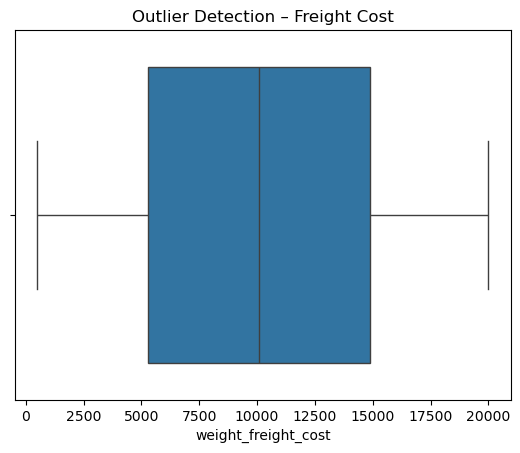

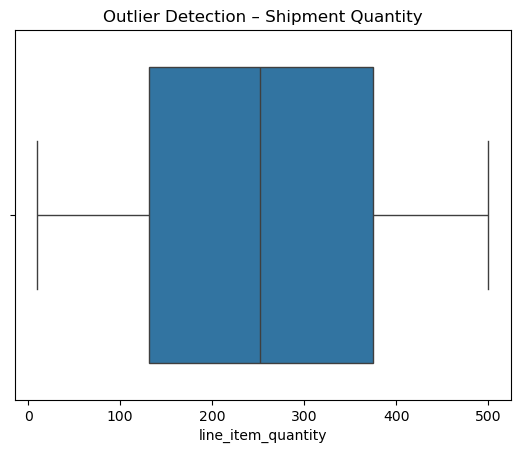

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate I detect outliers in cost or weight?
# Outliers in freight cost
sns.boxplot(x=df['weight_freight_cost'])
plt.title("Outlier Detection – Freight Cost")
plt.show()

# Outliers in shipment weight
sns.boxplot(x=df['line_item_quantity'])
plt.title("Outlier Detection – Shipment Quantity")
plt.show()


In [22]:
#convert to datatime
df['po_sent_to_vendor_date'] = pd.to_datetime(
    df['po_sent_to_vendor_date'], errors='coerce'
)

df['schedule_delivery_date'] = pd.to_datetime(
    df['schedule_delivery_date'], errors='coerce'
)


In [23]:
# Calculate check the average delivery time?
df['delivery_time_days'] = (
    df['schedule_delivery_date'] - df['po_sent_to_vendor_date']
).dt.days


In [24]:
average_delivery_time = df['delivery_time_days'].mean()

print("Average Delivery Time (Days):", round(average_delivery_time, 2))


Average Delivery Time (Days): 12.44


In [25]:
# Calculate shipment volume by mode
df.groupby('shipment_mode')['delivery_time_days'].mean()


shipment_mode
FedEx Air        12.453372
FedEx Express    12.493218
FedEx Ground     12.365212
Name: delivery_time_days, dtype: float64

In [26]:
df['delivery_time_days'].describe()


count    5000.000000
mean       12.436800
std         4.626001
min         5.000000
25%         8.000000
50%        12.000000
75%        16.000000
max        20.000000
Name: delivery_time_days, dtype: float64

In [27]:
shipment_counts = df['shipment_mode'].value_counts()


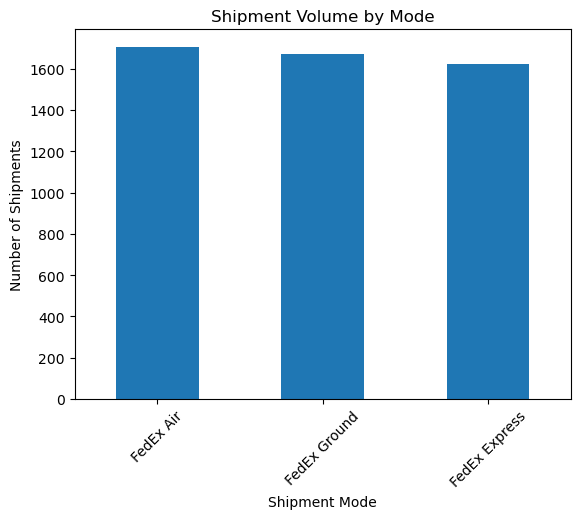

In [28]:
shipment_counts.plot(kind='bar')

plt.title("Shipment Volume by Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Number of Shipments")
plt.xticks(rotation=45)
plt.show()


In [32]:
# compare shipping costs by customer segment?
df['customer_segment'] = df['shipment_mode'].map({
    'FedEx Air': 'Business',
    'FedEx Express': 'Business',
    'FedEx Ground': 'Retail'
})


In [33]:
avg_cost_by_segment = (
    df.groupby('customer_segment')['weight_freight_cost']
      .mean()
)


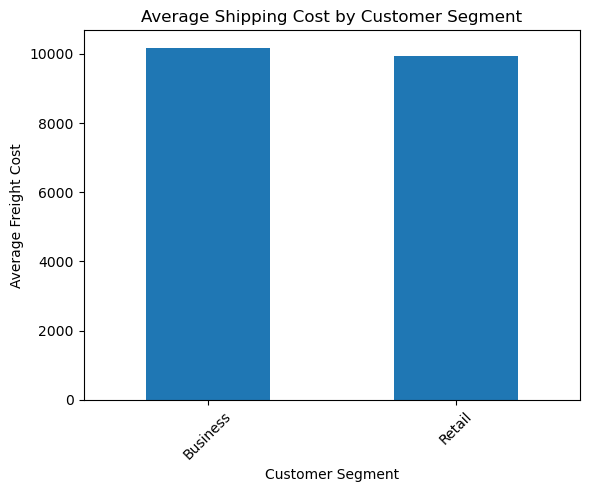

In [34]:
import matplotlib.pyplot as plt

avg_cost_by_segment.plot(kind='bar')

plt.title("Average Shipping Cost by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Freight Cost")
plt.xticks(rotation=45)
plt.show()


In [35]:
df['po_sent_to_vendor_date'] = pd.to_datetime(
    df['po_sent_to_vendor_date'], errors='coerce'
)

df['schedule_delivery_date'] = pd.to_datetime(
    df['schedule_delivery_date'], errors='coerce'
)


In [36]:
df['delivery_time_days'] = (
    df['schedule_delivery_date'] - df['po_sent_to_vendor_date']
).dt.days


In [37]:
SLA_DAYS = 10

df['delivery_status'] = df['delivery_time_days'].apply(
    lambda x: 'Delayed' if x > SLA_DAYS else 'On Time'
)


In [38]:
delay_by_mode = pd.crosstab(
    df['shipment_mode'],
    df['delivery_status']
)

print(delay_by_mode)


delivery_status  Delayed  On Time
shipment_mode                    
FedEx Air           1052      653
FedEx Express       1023      599
FedEx Ground        1039      634


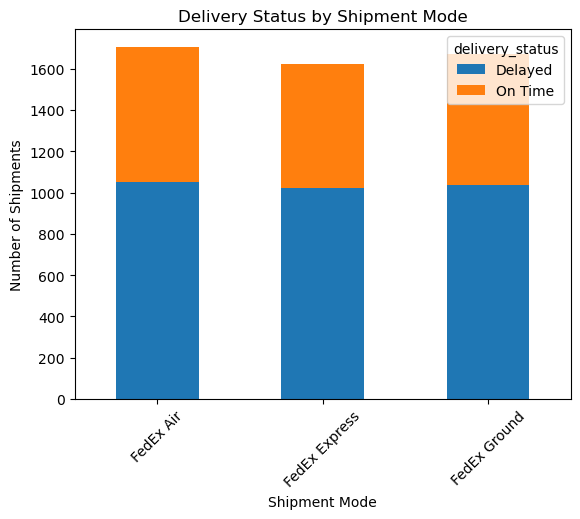

In [39]:
# Delivery Status by Shipment mode
delay_by_mode.plot(kind='bar', stacked=True)

plt.title("Delivery Status by Shipment Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Number of Shipments")
plt.xticks(rotation=45)
plt.show()


In [4]:
df['pq_first_sent_to_client_date'] = pd.to_datetime(
    df['pq_first_sent_to_client_date'], errors='coerce'
)

df['po_sent_to_vendor_date'] = pd.to_datetime(
    df['po_sent_to_vendor_date'], errors='coerce'
)

df['schedule_delivery_date'] = pd.to_datetime(
    df['schedule_delivery_date'], errors='coerce'
)


In [5]:
df['po_sent_to_vendor_date'] = pd.to_datetime(
    df['po_sent_to_vendor_date'], errors='coerce'
)

df['schedule_delivery_date'] = pd.to_datetime(
    df['schedule_delivery_date'], errors='coerce'
)


In [6]:
df['delivery_time_days'] = (
    df['schedule_delivery_date'] - df['po_sent_to_vendor_date']
).dt.days


In [7]:
SLA_DAYS = 10

df['delivery_status'] = df['delivery_time_days'].apply(
    lambda x: 'Delayed' if x > SLA_DAYS else 'On Time'
)


In [8]:
delay_by_mode = pd.crosstab(
    df['shipment_mode'],
    df['delivery_status']
)

print(delay_by_mode)


delivery_status  Delayed  On Time
shipment_mode                    
FedEx Air           1052      653
FedEx Express       1023      599
FedEx Ground        1039      634


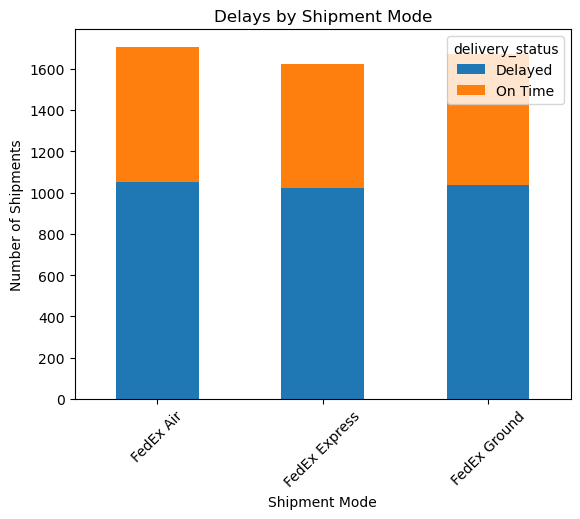

In [9]:
delay_by_mode.plot(kind='bar', stacked=True)

plt.title("Delays by Shipment Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Number of Shipments")
plt.xticks(rotation=45)
plt.show()


In [10]:
#find the most common origin-destination city pairs?
origin_destination_counts = (
    df.groupby(['manufacturing_site', 'first_time_destination'])
      .size()
      .reset_index(name='shipment_count')
      .sort_values(by='shipment_count', ascending=False)
)

origin_destination_counts.head(5)


,manufacturing_site,first_time_destination,shipment_count
4,Germany,Mumbai,276
19,USA,Mumbai,274
6,India,Chennai,267
14,Singapore,Mumbai,263
7,India,Delhi,262


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17624\3714234530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5['route'] = (


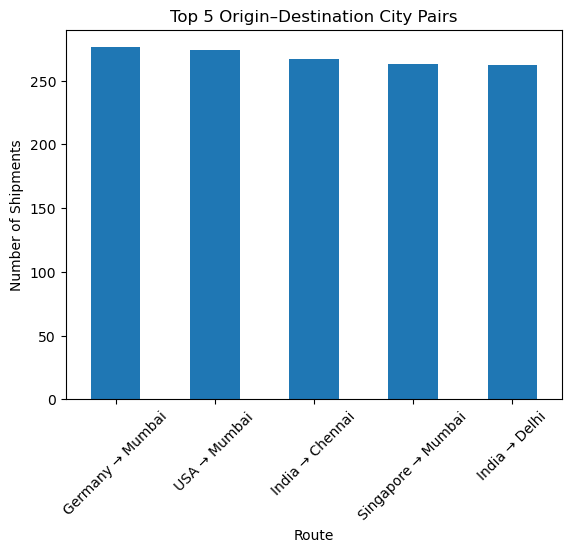

In [12]:
# Create origin-destination route column
top5['route'] = (
    top5['manufacturing_site'] + " → " + top5['first_time_destination']
)

# Plot
top5.plot(
    kind='bar',
    x='route',
    y='shipment_count',
    legend=False
)

import matplotlib.pyplot as plt
plt.title("Top 5 Origin–Destination City Pairs")
plt.xlabel("Route")
plt.ylabel("Number of Shipments")
plt.xticks(rotation=45)
plt.show()


In [14]:
# find the most common delay reasons?
df['po_sent_to_vendor_date'] = pd.to_datetime(
    df['po_sent_to_vendor_date'], errors='coerce'
)

df['schedule_delivery_date'] = pd.to_datetime(
    df['schedule_delivery_date'], errors='coerce'
)

df['delivery_time_days'] = (
    df['schedule_delivery_date'] - df['po_sent_to_vendor_date']
).dt.days


In [15]:
SLA_DAYS = 10

df['delivery_status'] = df['delivery_time_days'].apply(
    lambda x: 'Delayed' if x > SLA_DAYS else 'On Time'
)


In [16]:
def assign_delay_reason(row):
    if row['delivery_time_days'] > 20:
        return 'Operational Delay'
    elif row['delivery_time_days'] > 15:
        return 'Vendor Delay'
    elif row['delivery_time_days'] > 10:
        return 'Logistics Delay'
    else:
        return 'No Delay'

df['delay_reason'] = df.apply(assign_delay_reason, axis=1)


In [17]:
delay_reason_counts = df['delay_reason'].value_counts()
print(delay_reason_counts)


delay_reason
No Delay           1886
Logistics Delay    1578
Vendor Delay       1536
Name: count, dtype: int64


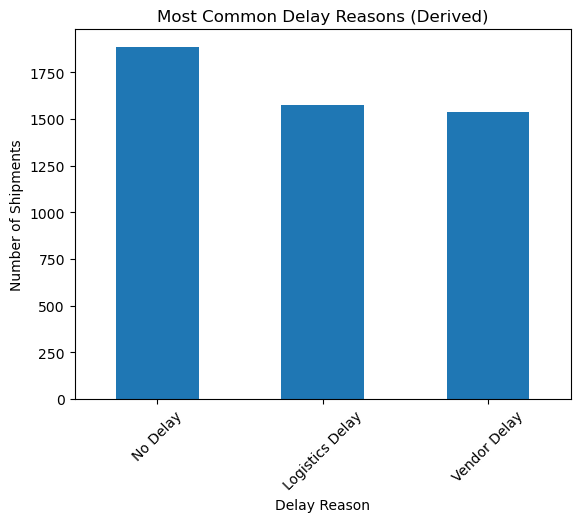

In [18]:
delay_reason_counts.plot(kind='bar')

plt.title("Most Common Delay Reasons (Derived)")
plt.xlabel("Delay Reason")
plt.ylabel("Number of Shipments")
plt.xticks(rotation=45)
plt.show()


In [20]:
df['delivery_time_days'] = (
    df['schedule_delivery_date'] - df['po_sent_to_vendor_date']
).dt.days


In [21]:
df = df[df['delivery_time_days'] >= 0]


In [22]:
avg_delivery_time = (
    df.groupby('shipment_mode')['delivery_time_days']
      .mean()
      .sort_values()
)

print(avg_delivery_time)


shipment_mode
FedEx Ground     12.365212
FedEx Air        12.453372
FedEx Express    12.493218
Name: delivery_time_days, dtype: float64


In [23]:
avg_delivery_time = (
    df.groupby('shipment_mode')['delivery_time_days']
      .mean()
      .sort_values()
)

print(avg_delivery_time)


shipment_mode
FedEx Ground     12.365212
FedEx Air        12.453372
FedEx Express    12.493218
Name: delivery_time_days, dtype: float64


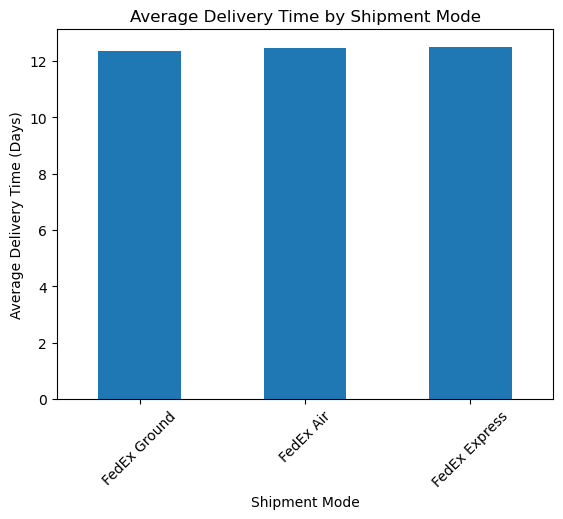

In [24]:
avg_delivery_time.plot(kind='bar')

plt.title("Average Delivery Time by Shipment Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Average Delivery Time (Days)")
plt.xticks(rotation=45)
plt.show()


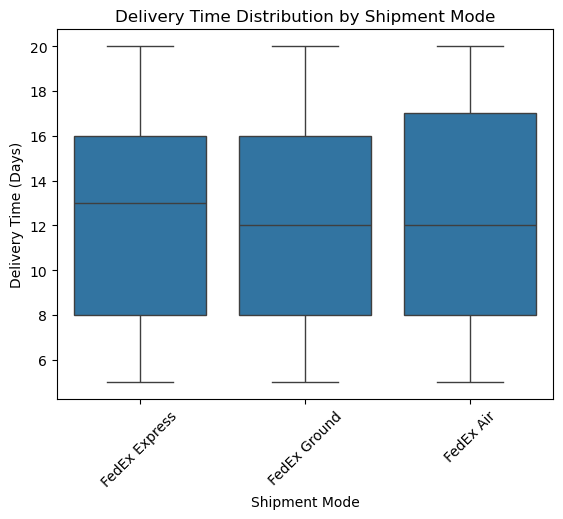

In [25]:
sns.boxplot(
    data=df,
    x='shipment_mode',
    y='delivery_time_days'
)

plt.title("Delivery Time Distribution by Shipment Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Delivery Time (Days)")
plt.xticks(rotation=45)
plt.show()


In [27]:
#compare delivery time across shipment modes?
delivery_by_mode = (
    df.groupby('shipment_mode')['delivery_time_days']
      .mean()
)


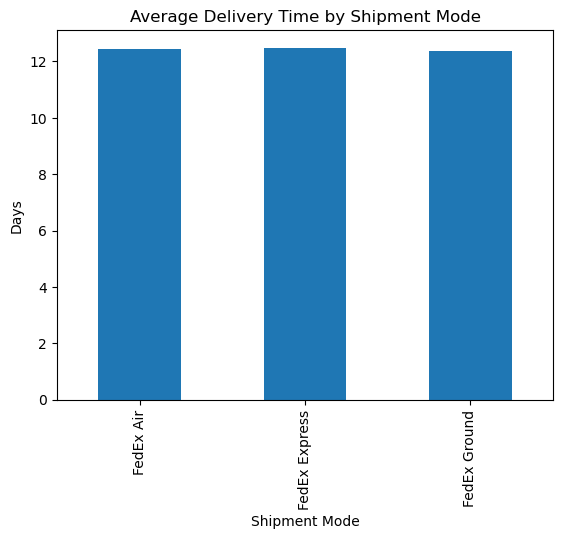

In [28]:
delivery_by_mode.plot(kind='bar')
plt.title("Average Delivery Time by Shipment Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Days")
plt.show()


In [29]:
mode_efficiency = (
    df.groupby('shipment_mode')['delivery_time_days']
      .mean()
      .sort_values()
)

print(mode_efficiency)


shipment_mode
FedEx Ground     12.365212
FedEx Air        12.453372
FedEx Express    12.493218
Name: delivery_time_days, dtype: float64


In [30]:
city_delays = (
    df.groupby('first_time_destination')['delivery_time_days']
      .mean()
      .sort_values(ascending=False)
)

print(city_delays.head(10))


first_time_destination
Mumbai       12.828330
Delhi        12.360406
Chennai      12.354743
Bangalore    12.315948
Hyderabad    12.289362
Name: delivery_time_days, dtype: float64


In [31]:
delay_by_mode = (
    df.groupby('shipment_mode')['delivery_time_days']
      .mean()
      .sort_values(ascending=False)
)

print(delay_by_mode)


shipment_mode
FedEx Express    12.493218
FedEx Air        12.453372
FedEx Ground     12.365212
Name: delivery_time_days, dtype: float64


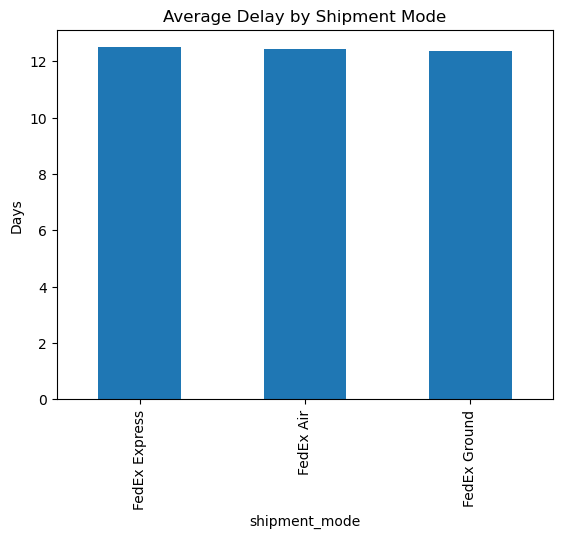

In [32]:
delay_by_mode.plot(kind='bar')
plt.title("Average Delay by Shipment Mode")
plt.ylabel("Days")
plt.show()


In [33]:
df['weight_bucket'] = pd.cut(
    df['weight_freight_cost'],
    bins=5
)

weight_delay = df.groupby('weight_bucket')['delivery_time_days'].mean()
print(weight_delay)


weight_bucket
(483.637, 4401.666]       12.477118
(4401.666, 8300.202]      12.261952
(8300.202, 12198.738]     12.414093
(12198.738, 16097.274]    12.462322
(16097.274, 19995.81]     12.576236
Name: delivery_time_days, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17624\1713512409.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_delay = df.groupby('weight_bucket')['delivery_time_days'].mean()


In [34]:
cost_by_mode = (
    df.groupby('shipment_mode')['weight_freight_cost']
      .mean()
      .sort_values(ascending=False)
)

print(cost_by_mode)


shipment_mode
FedEx Air        10284.435771
FedEx Express    10055.069858
FedEx Ground      9943.655284
Name: weight_freight_cost, dtype: float64


In [35]:
route_cost = (
    df.groupby(['manufacturing_site', 'first_time_destination'])
      ['weight_freight_cost']
      .mean()
      .sort_values(ascending=False)
)

print(route_cost.head(5))


manufacturing_site  first_time_destination
India               Delhi                     10897.163626
Germany             Mumbai                    10756.543587
India               Chennai                   10675.928764
Singapore           Mumbai                    10385.102510
Germany             Delhi                     10364.080080
Name: weight_freight_cost, dtype: float64


In [36]:
Q1 = df['weight_freight_cost'].quantile(0.25)
Q3 = df['weight_freight_cost'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['weight_freight_cost'] < Q1 - 1.5 * IQR) |
    (df['weight_freight_cost'] > Q3 + 1.5 * IQR)
]

print(outliers.shape)

(0, 29)
